In [28]:
from sympy import *
from sympy.matrices import *
import mpmath
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
init_printing()

In [3]:
# theta, epsilon, u, T, L, l, Dw, Dv, g, a, b, c, m, I, x, y = symbols('theta epsilon u T L l D_w D_v g a b c m I x y')
theta, epsilon, u, T, L, g, a, b, c, m, I, x, y = symbols('theta epsilon u T L g a b c m I x y')

In [4]:
def pseudo_abs(x):
    return sqrt(x**22 + epsilon) - sqrt(epsilon)

In [59]:
v = sqrt(a**2 + b**2)
phi = atan2(b,a)

xdot = a
ydot = b
thetadot = c

# With drag
# adot = 1/m * (-sin(theta + u) * T + sin(phi) * v**2 * pseudo_abs(sin(theta - phi)) * Dv)
# bdot = 1/m * (cos(theta + u) * T - cos(phi) * v**2 * pseudo_abs(sin(theta - phi)) * Dv) - g
# cdot = 1/I * (sin(u) * T * L - pseudo_abs(c)*c * Dw + l*v**2 * sin(theta - phi) * Dv)

T = m*g
u = theta + theta

# Without drag
adot = 1/m * (-sin(theta + u) * T)
bdot = 1/m * (cos(theta + u) * T) - g
cdot = 1/I * (sin(u) * T * L)

In [60]:
pprint(adot)
pprint(bdot)
pprint(cdot)

-g⋅sin(3⋅θ)
g⋅cos(3⋅θ) - g
ⅈ⋅g⋅m⋅sin(2⋅θ)


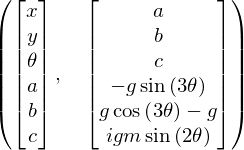

In [61]:
state_vec = Matrix([x, y, theta, a, b, c])
state_vec_dot = Matrix([xdot, ydot, thetadot, adot, bdot, cdot])
state_vec, state_vec_dot

\left[\begin{matrix}0 & 0 & 0 & 1 & 0 & 0\\0 & 0 & 0 & 0 & 1 & 0\\0 & 0 & 0 & 0 & 0 & 1\\0 & 0 & - 3 g \cos{\left (3 \theta \right )} & 0 & 0 & 0\\0 & 0 & - 3 g \sin{\left (3 \theta \right )} & 0 & 0 & 0\\0 & 0 & 2 i g m \cos{\left (2 \theta \right )} & 0 & 0 & 0\end{matrix}\right]


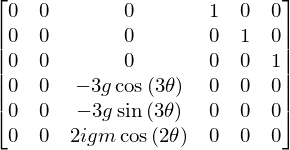

In [62]:
jac = state_vec_dot.jacobian(state_vec)
print(latex(jac))
jac

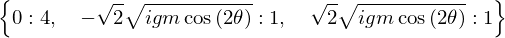

In [63]:
jac.eigenvals()

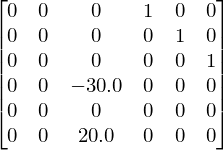

In [64]:
# drag parameters
l_real = 0.
Dv_real = 0.
Dw_real = 0.

# other params
L_real = -1
I_real = 1.
m_real = 1.
g_real = 10.
theta_real = 0
phi_real = 0.
epsilon_real = 1e-10
a_real = 0.
b_real = 1.
c_real = 0.

# with drag
# jac_subs = jac.subs(L,L_real).subs(l,l_real).subs(Dv, Dv_real).subs(Dw, Dw_real).subs(I, I_real).subs(m,m_real).subs(g,g_real).subs(T, T_real).subs(theta, theta_real).subs(phi,phi_real).subs(epsilon, epsilon_real).subs(a,a_real).subs(b,b_real).subs(c,c_real)

# without drag
jac_subs = jac.subs(L,L_real).subs(I, I_real).subs(m,m_real).subs(g,g_real).subs(theta, theta_real).subs(phi,phi_real).subs(epsilon, epsilon_real).subs(a,a_real).subs(b,b_real).subs(c,c_real)
jac_subs_np = np.array(jac_subs,dtype=np.float64)
jac_subs

In [65]:
[evals, evecs] = np.linalg.eig(jac_subs_np)

In [66]:
np.set_printoptions(linewidth=200, suppress=True)
# print(evals, '\n')
# print(evecs)
print(np.real(evals))
print(np.imag(evals),'\n')
print(np.real(evecs))
print(np.imag(evecs))
#[print(vec) for vec in np.real(evecs)]

[ 0.          0.          4.47213595 -4.47213595  0.          0.        ]
[0. 0. 0. 0. 0. 0.] 

[[ 1.         -1.         -0.18156826  0.18156826  0.          0.        ]
 [ 0.          0.          0.          0.          1.         -1.        ]
 [ 0.          0.          0.12104551 -0.12104551  0.          0.        ]
 [ 0.          0.         -0.81199794 -0.81199794  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.54133196  0.54133196  0.          0.        ]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
